## Feature Extraction

In [2]:
import numpy as np # linear algebra
import pandas as pd
import gc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import skew
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')

## Load categorical and numerical features from train and test data sets

In [3]:
########### TRAIN #############
# Load data sets
train=pd.read_csv('inputs/train.csv')
loss=train.loss
train.drop(['id','loss'],axis=1,inplace=True)

# Seperate numerical and categorical features
tr_num_feat=train.select_dtypes(exclude='object')
tr_cat_feat=train.select_dtypes(include='object')

# Record numerical and categorical columns
tr_num_cols=tr_num_feat.columns
tr_cat_cols=tr_cat_feat.columns

# Delete train data frame to save RAM
del train
gc.collect()

########### TEST #############
# Load data sets
test=pd.read_csv('inputs/test.csv')
test_id=test.id
test.drop(['id'],axis=1,inplace=True)

# Seperate numerical and categorical features
te_num_feat=test.select_dtypes(exclude='object')
te_cat_feat=test.select_dtypes(include='object')

# Record numerical and categorical columns
te_num_cols=te_num_feat.columns
te_cat_cols=te_cat_feat.columns

# Delete train data set
del test
gc.collect()

0

## A. Numerical features <br>
### 1. Transformation <br>
#### 1.1 Record feature skewness before the transformation <br>
Note skewness for the noraml distribution should be about zero

In [4]:
########### TRAIN #############
# Record absolute skewness of the numeric features before feature transformation
tr_away_from_zero=[]
for feat in tr_num_cols:
    tr_away_from_zero.append(np.abs(0-skew(tr_num_feat[feat])))
    
########### TEST #############    
# Record absolute skewness of the numeric features before feature transformation
te_away_from_zero=[]
for feat in te_num_cols:
    te_away_from_zero.append(np.abs(0-skew(te_num_feat[feat])))

#### 1.2 Add all appropriate transformations for each features in a list <br>
Selection of each transformation is done manually with the aim of pushing skewness value for each features from the train set to below 0.1

In [5]:
########### TRAIN #############
# Record appropriate feature transformations
tr_temp=[boxcox(tr_num_feat[tr_num_cols[0]]+1)[0],
      np.tan(tr_num_feat[tr_num_cols[1]]),
      tr_num_feat[tr_num_cols[2]],
     boxcox(tr_num_feat[tr_num_cols[3]])[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(tr_num_feat['cont5']).reshape(-1,1))),
     (tr_num_feat[tr_num_cols[5]])**0.5,
     boxcox(tr_num_feat[tr_num_cols[6]])[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(tr_num_feat['cont8']).reshape(-1,1))),
     boxcox(tr_num_feat[tr_num_cols[8]]+1)[0],
     boxcox(tr_num_feat[tr_num_cols[9]]+1)[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(tr_num_feat['cont11']).reshape(-1,1))),
     np.sqrt(MinMaxScaler().fit_transform(np.array(tr_num_feat['cont12']).reshape(-1,1))),
     np.log(MinMaxScaler().fit_transform(np.array(tr_num_feat['cont5']).reshape(-1,1))+0.1),
     (tr_num_feat[tr_num_cols[13]])**0.5]

########### TEST #############
# Record appropriate feature transformations
te_temp=[boxcox(te_num_feat[te_num_cols[0]]+1)[0],
      np.tan(te_num_feat[te_num_cols[1]]),
      te_num_feat[te_num_cols[2]],
     boxcox(te_num_feat[te_num_cols[3]])[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(te_num_feat['cont5']).reshape(-1,1))),
     (te_num_feat[te_num_cols[5]])**0.5,
     boxcox(te_num_feat[te_num_cols[6]])[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(te_num_feat['cont8']).reshape(-1,1))),
     boxcox(te_num_feat[te_num_cols[8]]+1)[0],
     boxcox(te_num_feat[te_num_cols[9]]+1)[0],
     np.sqrt(MinMaxScaler().fit_transform(np.array(te_num_feat['cont11']).reshape(-1,1))),
     np.sqrt(MinMaxScaler().fit_transform(np.array(te_num_feat['cont12']).reshape(-1,1))),
     np.log(MinMaxScaler().fit_transform(np.array(te_num_feat['cont5']).reshape(-1,1))+0.1),
     (te_num_feat[te_num_cols[13]])**0.5]

#### 1.3 Observe skewness after the transformation and compre it with the features before transformation

Maximum train skew after transformation is 0.09295090402153014
Maximum test skew after transformation is 0.09834972857117359


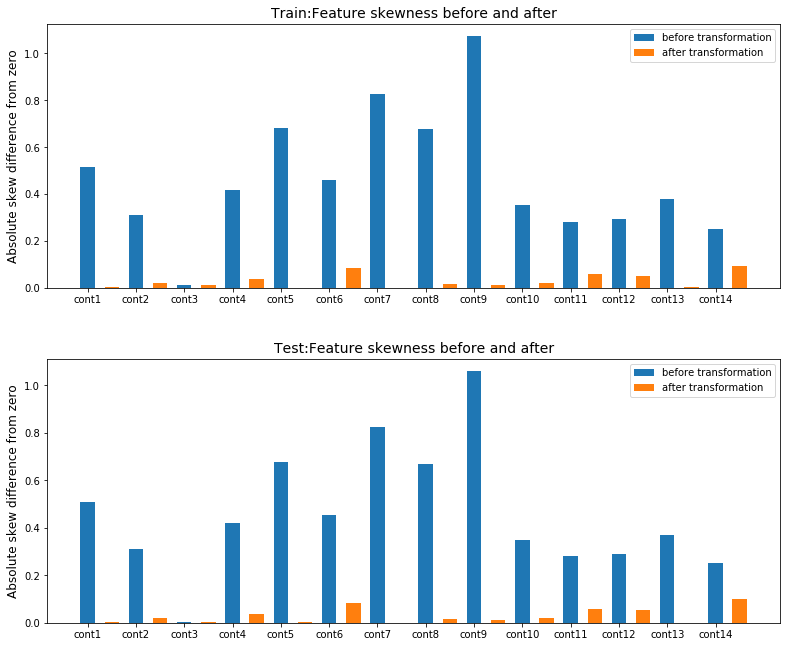

In [6]:
########### TRAIN #############
# Record absolute skewness of the features after feature transformation
tr_new_away_from_zero=[]
for s in tr_temp:
    tr_new_away_from_zero.append(abs(0-skew(s)))

########### TEST #############
# Record absolute skewness of the features after feature transformation
te_new_away_from_zero=[]
for s in te_temp:
    te_new_away_from_zero.append(abs(0-skew(s)))

# let's check improvement in feature skewness after feature transformation
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,10))
fig.tight_layout(pad=5)
ax[0].bar(range(len(tr_away_from_zero)),tr_away_from_zero,width=0.3,label='before transformation')
ax[0].bar(np.array(range(len(tr_new_away_from_zero)))+0.5,tr_new_away_from_zero,width=0.3,label='after transformation')
ax[0].set_xticks(range(len(tr_away_from_zero)))
ax[0].set_xticklabels(tr_num_cols)
ax[0].set_ylabel('Absolute skew difference from zero',fontsize=12)
ax[0].legend()
ax[0].set_title('Train:Feature skewness before and after',fontsize=14)
print('Maximum train skew after transformation is',max(tr_new_away_from_zero))

ax[1].bar(range(len(te_away_from_zero)),te_away_from_zero,width=0.3,label='before transformation')
ax[1].bar(np.array(range(len(te_new_away_from_zero)))+0.5,te_new_away_from_zero,width=0.3,label='after transformation')
ax[1].set_xticks(range(len(te_away_from_zero)))
ax[1].set_xticklabels(te_num_cols)
ax[1].set_ylabel('Absolute skew difference from zero',fontsize=12)
ax[1].legend()
ax[1].set_title('Test:Feature skewness before and after',fontsize=14)
print('Maximum test skew after transformation is',max(te_new_away_from_zero));

#### 1.4 Replace the transformed features (with feature standardization) back to the original data frame

In [7]:
# Note: scaling does not change skewness
for ind,col in enumerate(tr_num_feat.columns):
    tr_num_feat[col]=scale(tr_temp[ind])
    
for ind,col in enumerate(te_num_feat.columns):
    te_num_feat[col]=scale(te_temp[ind])

### 2 Feature interactions <br>
From the exploratory data analysis we recognized the list of feature pairs with high (more than 0.7) linear dependence :
<ul>
    <li>feat 1 & feat 6</li>
    <li>feat 1 & feat 9</li>
    <li>feat 1 & feat 10</li>
    <li>feat 6 & feat 9</li>
    <li>feat 6 & feat 10</li>
    <li>feat 6 & feat 11</li>
    <li>feat 6 & feat 12</li>
    <li>feat 6 & feat 13</li>
    <li>feat 7 & feat 11</li>
    <li>feat 7 & feat 12</li>
</ul>

In [8]:
# idea from https://github.com/alno/kaggle-allstate-claims-severity/blob/master/prepare-tr_numeric-combinations.py
tr_num_feat['diff_1_6']=tr_num_feat['cont1']-tr_num_feat['cont6']
tr_num_feat['diff_1_9']=tr_num_feat['cont1']-tr_num_feat['cont9']
tr_num_feat['diff_1_10']=tr_num_feat['cont1']-tr_num_feat['cont10']
tr_num_feat['diff_6_9']=tr_num_feat['cont6']-tr_num_feat['cont9']
tr_num_feat['diff_6_10']=tr_num_feat['cont6']-tr_num_feat['cont10']
tr_num_feat['diff_6_11']=tr_num_feat['cont6']-tr_num_feat['cont11']
tr_num_feat['diff_6_12']=tr_num_feat['cont6']-tr_num_feat['cont12']
tr_num_feat['diff_6_13']=tr_num_feat['cont6']-tr_num_feat['cont13']
tr_num_feat['diff_7_11']=tr_num_feat['cont7']-tr_num_feat['cont11']
tr_num_feat['diff_7_12']=tr_num_feat['cont7']-tr_num_feat['cont12']

te_num_feat['diff_1_6']=te_num_feat['cont1']-te_num_feat['cont6']
te_num_feat['diff_1_9']=te_num_feat['cont1']-te_num_feat['cont9']
te_num_feat['diff_1_10']=te_num_feat['cont1']-te_num_feat['cont10']
te_num_feat['diff_6_9']=te_num_feat['cont6']-te_num_feat['cont9']
te_num_feat['diff_6_10']=te_num_feat['cont6']-te_num_feat['cont10']
te_num_feat['diff_6_11']=te_num_feat['cont6']-te_num_feat['cont11']
te_num_feat['diff_6_12']=te_num_feat['cont6']-te_num_feat['cont12']
te_num_feat['diff_6_13']=te_num_feat['cont6']-te_num_feat['cont13']
te_num_feat['diff_7_11']=te_num_feat['cont7']-te_num_feat['cont11']
te_num_feat['diff_7_12']=te_num_feat['cont7']-te_num_feat['cont12']

### 3. Save test numeric data frame

In [9]:
te_num_feat.to_csv('inputs/te_num.csv')
del te_num_feat
gc.collect()

35

## B. Categorical features: Encoding <br>
## 1. Binary categorical features
### 1.1 Binary Encoding

In [10]:
# Extract binary column names
tr_bi_cols=tr_cat_cols[:72]
te_bi_cols=te_cat_cols[:72]

# Number of rows
tr_nrows=tr_cat_feat.shape[0]
te_nrows=te_cat_feat.shape[0]

# Make copy of binary data frame. We will work on the copied data frame
tr_bi_df=tr_cat_feat[tr_bi_cols].copy()
te_bi_df=te_cat_feat[te_bi_cols].copy()

# Convert categories into 0-1
for feat in tr_bi_cols:
    tr_bi_df[feat]=tr_bi_df[feat].astype('category').cat.codes
    te_bi_df[feat]=te_bi_df[feat].astype('category').cat.codes
    
# Rename columns
tr_bi_dict=dict(zip(tr_bi_cols,['bi_'+col for col in tr_bi_cols]))
tr_bi_df.rename(columns=tr_bi_dict, inplace=True)
te_bi_df.rename(columns=tr_bi_dict, inplace=True)

### 1.2 Probability encoding of binary values

In [11]:
# Make copy of the binary encoded data frame
tr_ProbBi_df=tr_cat_feat[tr_bi_cols].copy()
te_ProbBi_df=te_cat_feat[te_bi_cols].copy()

# Convert binary values into probabilities
for feat in tr_bi_cols:
    tr_ProbBi_dict=dict(zip(tr_ProbBi_df[feat].value_counts().index,tr_ProbBi_df[feat].value_counts()/tr_nrows))
    # Use probability values calculated only on the train data set
    tr_ProbBi_df[feat].replace(tr_ProbBi_dict,inplace=True)
    te_ProbBi_df[feat].replace(tr_ProbBi_dict,inplace=True)
    
# Rename columns
tr_ProbBi_df.rename(columns=dict(zip(tr_bi_cols,['ProbBi_'+col for col in tr_bi_cols])), inplace=True)
te_ProbBi_df.rename(columns=dict(zip(te_bi_cols,['ProbBi_'+col for col in te_bi_cols])), inplace=True)

## 2. Multi level categorical encoding

In [12]:
# Extract multi level categorical features
tr_multi_cols=tr_cat_cols[72:]
te_multi_cols=te_cat_cols[72:]

# Make copy of multi level categorical features' data frame
tr_multi_cat_feat=tr_cat_feat[tr_multi_cols].copy()
te_multi_cat_feat=te_cat_feat[te_multi_cols].copy()

# Add log loss (shift and scaled) only into train-multi categorical feature data frame
tr_multi_cat_feat['log_loss']=np.log(loss+1)**0.25

# Remove categorical feature data frame from RAM
del tr_cat_feat
del te_cat_feat
gc.collect()

# Make copy of the data frames for each feature engineering method (We will work on the copied data frame)
# train
tr_min_df=tr_multi_cat_feat.copy()
tr_max_df=tr_multi_cat_feat.copy()
tr_mean_df=tr_multi_cat_feat.copy()
tr_std_df=tr_multi_cat_feat.copy()
tr_ohe_df=tr_multi_cat_feat.copy()
tr_asci_df=tr_multi_cat_feat.copy()
tr_MultiProb_df=tr_multi_cat_feat.copy()

# Drop log loss column from the data frames that don't need it
tr_ohe_df.drop('log_loss',axis=1,inplace=True)
tr_asci_df.drop('log_loss',axis=1,inplace=True)

# test
te_min_df=te_multi_cat_feat.copy()
te_max_df=te_multi_cat_feat.copy()
te_mean_df=te_multi_cat_feat.copy()
te_std_df=te_multi_cat_feat.copy()
te_ohe_df=te_multi_cat_feat.copy()
te_asci_df=te_multi_cat_feat.copy()
te_MultiProb_df=te_multi_cat_feat.copy()

# Remove copied (original) multi level categorical features from RAM
del tr_multi_cat_feat
del te_multi_cat_feat
gc.collect()

0

### 2.1 Min of log loss per level

In [13]:
for feat in tr_multi_cols:
    tr_min_dict=dict(tr_min_df.groupby(by=feat,as_index=False)['log_loss'].min().values)
    unexpected=set(te_min_df[feat].unique())-set(tr_min_df[feat].unique())
    
    # Mean of min of log loss over all levels
    val=np.mean(np.array([val for val in tr_min_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_min_dict[cat]=val
        
    # Use values calculated only on the train data set
    tr_min_df[feat].replace(tr_min_dict,inplace=True)
    te_min_df[feat].replace(tr_min_dict,inplace=True)
    
# Rename columns
tr_min_df.rename(columns=dict(zip(tr_multi_cols,['min_'+col for col in tr_multi_cols])), inplace=True)
te_min_df.rename(columns=dict(zip(te_multi_cols,['min_'+col for col in te_multi_cols])), inplace=True)

# Drop log loss from train
tr_min_df.drop('log_loss',axis=1,inplace=True)

### 2.2 Max of log loss per level

In [14]:
for feat in tr_multi_cols:
    tr_max_dict=dict(tr_max_df.groupby(by=feat,as_index=False)['log_loss'].max().values)
    unexpected=set(te_max_df[feat].unique())-set(tr_max_df[feat].unique())
    
    # Mean of max of log loss over all levels
    val=np.mean(np.array([val for val in tr_max_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_max_dict[cat]=val
    
    # Use values calculated only on the train data set
    tr_max_df[feat].replace(tr_max_dict,inplace=True)
    te_max_df[feat].replace(tr_max_dict,inplace=True)
    
# Rename column names
tr_max_df.rename(columns=dict(zip(tr_multi_cols,['max_'+col for col in tr_multi_cols])), inplace=True)
te_max_df.rename(columns=dict(zip(te_multi_cols,['max_'+col for col in te_multi_cols])), inplace=True)

# drop log loss column
tr_max_df.drop('log_loss',axis=1,inplace=True)

### 2.3 Mean of log loss per level

In [15]:
for feat in tr_multi_cols:
    tr_mean_dict=dict(tr_mean_df.groupby(by=feat,as_index=False)['log_loss'].mean().values)
    unexpected=set(te_mean_df[feat].unique())-set(tr_mean_df[feat].unique())
    
    # Mean of mean of log loss over all levels
    val=np.mean(np.array([val for val in tr_mean_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_mean_dict[cat]=val
        
    # Use values calculated only on the train data set  
    tr_mean_df[feat].replace(tr_mean_dict,inplace=True)
    te_mean_df[feat].replace(tr_mean_dict,inplace=True)
    
# Rename column names
tr_mean_df.rename(columns=dict(zip(tr_multi_cols,['mean_'+col for col in tr_multi_cols])), inplace=True)
te_mean_df.rename(columns=dict(zip(te_multi_cols,['mean_'+col for col in te_multi_cols])), inplace=True)

# Drop log loss column
tr_mean_df.drop('log_loss',axis=1,inplace=True)

### 2.4 Standard deviation of log loss per level

In [16]:
for feat in tr_multi_cols:
    gen=tr_std_df.groupby(by=feat)['log_loss'].std(ddof=0)
    tr_std_dict=dict(list(zip(gen.index,gen.values)))
    unexpected=set(te_std_df[feat].unique())-set(tr_std_df[feat].unique())
    
    # Mean of std of log loss over all levels
    val=np.mean(np.array([val for val in tr_std_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_std_dict[cat]=val 
    
    # Use values calculated only on the train data set
    tr_std_df[feat].replace(tr_std_dict,inplace=True)
    te_std_df[feat].replace(tr_std_dict,inplace=True)
    
# rename column names
tr_std_df.rename(columns=dict(zip(tr_multi_cols,['std_'+col for col in tr_multi_cols])), inplace=True)
te_std_df.rename(columns=dict(zip(te_multi_cols,['std_'+col for col in te_multi_cols])), inplace=True)

# drop log loss column
tr_std_df.drop('log_loss',axis=1,inplace=True)

### 2.5 One hot encoding

In [17]:
# Concat data frames for ohe
df=pd.concat([tr_ohe_df,te_ohe_df],ignore_index=False)
df=pd.get_dummies(df)

# Seperate data frame
tr_ohe_df=df.iloc[:tr_nrows]
te_ohe_df=df.iloc[tr_nrows:]

### 2.6 ASCI value encoding

In [18]:
for feat in tr_multi_cols:
    chars=tr_asci_df[feat].unique()
    vals=[]
    for char in chars:
        if len(char)==1:
            vals.append(ord(char))
        else:
            val=0
            for ch in char:
                val+=ord(ch)
            vals.append(val)
    tr_asci_dict=dict(list(zip(chars,vals)))

    unexpected=set(te_asci_df[feat].unique())-set(tr_asci_df[feat].unique())
    
    # Median of asci of log loss over all levels
    val=np.median(np.array([val for val in tr_asci_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_asci_dict[cat]=val 
    
    # Use values calculated only on the train data set    
    tr_asci_df[feat].replace(tr_asci_dict,inplace=True)
    te_asci_df[feat].replace(tr_asci_dict,inplace=True)
    
# rename column names
tr_asci_df.rename(columns=dict(zip(tr_multi_cols,['asci_'+col for col in tr_multi_cols])), inplace=True)
te_asci_df.rename(columns=dict(zip(te_multi_cols,['asci_'+col for col in te_multi_cols])), inplace=True)

### 2.7 Probability encoding of multi level categories

In [19]:
for feat in tr_multi_cols:
    tr_MultiProb_dict=dict(zip(tr_MultiProb_df[feat].value_counts().index,tr_MultiProb_df[feat].value_counts()/tr_nrows))
    unexpected=set(te_MultiProb_df[feat].unique())-set(tr_MultiProb_df[feat].unique())
    
    # Mean of probability value over all levels
    val=np.mean(np.array([val for val in tr_MultiProb_dict.values()]))
    
    # Encode unexpected levels by val
    for cat in unexpected:
        tr_MultiProb_dict[cat]=val 
    
    tr_MultiProb_df[feat].replace(tr_MultiProb_dict,inplace=True)
    te_MultiProb_df[feat].replace(tr_MultiProb_dict,inplace=True)

for feat in tr_multi_cols:
    tr_MultiProb_df[feat]=(tr_MultiProb_df[feat])/tr_nrows
    te_MultiProb_df[feat]=(te_MultiProb_df[feat])/te_nrows
    
# rename column names
tr_MultiProb_df.rename(columns=dict(zip(tr_multi_cols,['MultiProb_'+col for col in tr_multi_cols])), inplace=True)
te_MultiProb_df.rename(columns=dict(zip(te_multi_cols,['MultiProb_'+col for col in te_multi_cols])), inplace=True)

# drop log loss column

tr_MultiProb_df.drop('log_loss',axis=1,inplace=True)

## 3 Join all categorical encoded data frames to one data frame

In [20]:
# Observe shapes
tr_bi_df.shape,tr_ProbBi_df.shape,tr_min_df.shape,tr_max_df.shape,tr_mean_df.shape,tr_std_df.shape,tr_ohe_df.shape,tr_asci_df.shape,tr_MultiProb_df.shape

((188318, 72),
 (188318, 72),
 (188318, 44),
 (188318, 44),
 (188318, 44),
 (188318, 44),
 (188318, 1032),
 (188318, 44),
 (188318, 44))

In [21]:
# Observe shapes
te_bi_df.shape,te_ProbBi_df.shape,te_min_df.shape,te_max_df.shape,te_mean_df.shape,te_std_df.shape,te_ohe_df.shape,te_asci_df.shape,te_MultiProb_df.shape

((125546, 72),
 (125546, 72),
 (125546, 44),
 (125546, 44),
 (125546, 44),
 (125546, 44),
 (125546, 1032),
 (125546, 44),
 (125546, 44))

In [22]:
tr_cat_df=tr_bi_df.copy()
te_cat_df=te_bi_df.copy()
del tr_bi_df
del te_bi_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_ProbBi_df)
te_cat_df=te_cat_df.join(te_ProbBi_df)
del tr_ProbBi_df
del te_ProbBi_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_min_df)
te_cat_df=te_cat_df.join(te_min_df)
del tr_min_df
del te_min_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_max_df)
te_cat_df=te_cat_df.join(te_max_df)
del tr_max_df
del te_max_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_mean_df)
te_cat_df=te_cat_df.join(te_mean_df)
del tr_mean_df
del te_mean_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_std_df)
te_cat_df=te_cat_df.join(te_std_df)
del tr_std_df
del te_std_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_ohe_df)
te_cat_df=te_cat_df.join(te_ohe_df)
del tr_ohe_df
del te_ohe_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_asci_df)
te_cat_df=te_cat_df.join(te_asci_df)
del tr_asci_df
del te_asci_df
gc.collect()

tr_cat_df=tr_cat_df.join(tr_MultiProb_df)
te_cat_df=te_cat_df.join(te_MultiProb_df)
del tr_MultiProb_df
del te_MultiProb_df
gc.collect()

0

In [23]:
tr_cat_df.shape, te_cat_df.shape

((188318, 1440), (125546, 1440))

### 4 Save test data frame of encoded features

In [24]:
te_cat_df.to_csv('inputs/te_cat.csv')
del te_cat_df
gc.collect()

40

## C. Save main data frame (train with numerical and categorical features)

In [25]:
main_df=tr_cat_df.join(tr_num_feat)

In [26]:
main_df.to_csv('inputs/features.csv')